# The Data

## Task: Classify songs by Genre

1. Blues
2. Classical
3. Country
4. Disco
5. Hiphop
6. Jazz
7. Metal
8. Pop
9. Reggae
10. Rock

# Audio Labels are Semi-ambiguous

Example Audio files located Here:
http://voxogram.com/voxstudy/index.php/2015/10/28/user-specific-genre-classification/

(rrc ddh h pc)

### Step 1 : Getting the data 

Github: https://github.com/grgliner/voxResources

In [6]:
workingdir = !pwd
workingdir = workingdir[0]

'/Users/grgliner/Documents/Cos424/Assignment1/voxDemo'

In [ ]:
#workingdir = '/Users/Ted/Documents/__G2_Spring/__COS_424/'
!cd {workingdir} 
!git clone https://github.com/grgliner/voxResources.git

# Loading Data directly into Python

In [7]:
import sys
import random
import scipy.io as spio
import numpy as np

fileN = workingdir + '/data/country/country.00009.mat'
X = spio.loadmat(fileN)

# We also have a script that creates CSV files for each feature 

In [8]:
!python {workingdir}/tools/MAT2CSV.py {fileN}
!ls {workingdir}/data/country/

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'float'>
Value not of recognized type
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'unicode'>
Value not of recognized type
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'int'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'int'>
country.00000.mat                 country.00016.mat                 country.00044.mat                 country.00072.mat
country.00001.mat                 country.00017.mat                 country.00045.mat                 country.00073.mat
country.00002.mat                 country.00018.mat                 country.00046.mat                 country.00074.mat
country.00003.mat                 country.00019.mat                 country.00047.mat                 country.00075.mat
country.00004.mat                 country.00020.mat                 country.00048.mat                 country.00076.mat
country.00005.mat                 country.00021.mat   

# Features




In [17]:
# 'stat' 'eng' 'mfc' 'chroma' 'centers' 'other' 'class' 'class_name' 'filename'
X['DAT']['chroma'][0][0]

array([[ 0.02542235,  0.1048981 ,  0.92220176, ...,  0.39689143,
         0.63598104,  0.28134726],
       [ 0.03276627,  0.05398589,  0.52447225, ...,  0.14042514,
         0.21291596,  0.20908081],
       [ 0.21446331,  0.1820901 ,  0.69471   , ...,  0.2024848 ,
         0.21570388,  0.20156617],
       ..., 
       [ 0.12661818,  0.23559392,  0.59368012, ...,  0.88406751,
         0.96387546,  0.77172612],
       [ 0.18818351,  0.08854266,  0.2054003 , ...,  0.99999997,
         0.99999996,  0.94609987],
       [ 0.31903587,  0.27816453,  0.72078414, ...,  0.36245389,
         0.7359491 ,  0.9279002 ]])

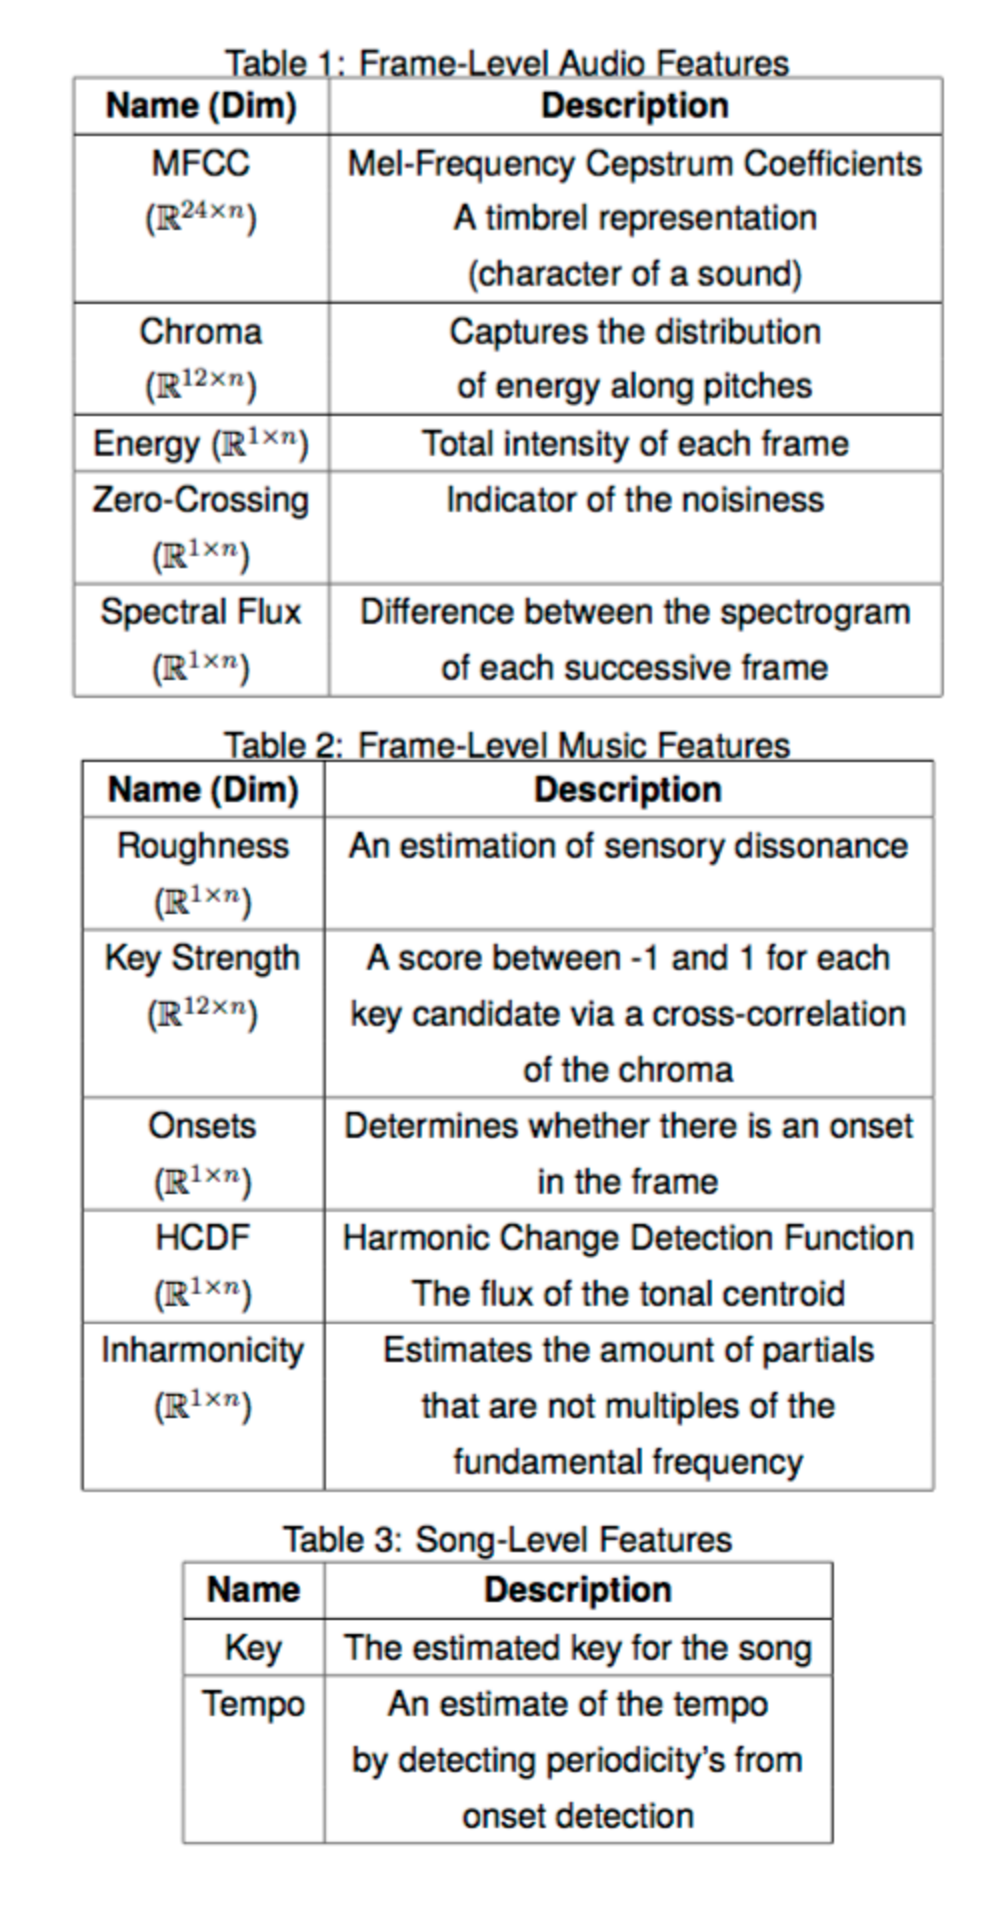

In [25]:
## This is for an `png` image
from IPython.display import Image
fig = Image(filename=(workingdir + '/featureTable.png'),width=400,height=500)
fig

# Ted's Talk

these are matrices, you need vector vanilla approach doesn't work (we demo SVM results) 

# Sample workflow for Exemplar and Fisher Vector

In [26]:
%%writefile {workingdir}/FV_demo.m

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%
% Fv_demo
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%Change this to the directory containing your data folder

dirn = '/Users/grgliner/Documents/Cos424/Assignment1/voxResources';

%intitialize the FV toolbox - you will need to change the filepath appropriately

run('/Users/grgliner/Documents/MATLAB/vlfeat-0.9.20/toolbox/vl_setup')

%add tools path - you will need to change the filepath appropriately

addpath(genpath('/Users/grgliner/Documents/Cos424/Assignment1/voxResources/tools'))

%load all songs into a single struct

[DAT, LB, FNS] = loadAll(dirn);

%extract the MFCC feature

mfcc = cell(1,1000);

for i = 1:length(DAT)

    mfcc{i} = DAT{i}.mfc;

end

%create the structure used as input into the demo_fv

GENDATA.data = mfcc;

GENDATA.class = LB;

GENDATA.classnames = {'Blues', 'Classical', 'Country', 'Disco', 'Hiphop',...

    'Jazz', 'Metal', 'Pop', 'Reggae', 'Rock'};


%run fisher vector

FV = demo_fv(GENDATA, 3, 3)

Writing /Users/grgliner/Documents/Cos424/Assignment1/voxDemo/FV_demo.m


# Main Point

3 types data you can use

1. Raw digital files
2. FV/Exemplar feature extraction
3. Extract your own features from the raw audio files (independent work)

# PT 2: Classifier Demos

In [45]:
# actual import mfcc from FV
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
mfcc = X['OPUS']['mfc'][0][0]
N = mfcc.shape[1]
labels = np.array([i % 3 for i in range(0,N)])

maxLearners = 100
maxDepth = 5
TEidx = np.array(random.sample(range(0,N), N/10))
X_TE = mfcc[:,TEidx]
X_TR = mfcc[:,[i for i in range(0,N) if i not in TEidx]]
Y_TE = labels[TEidx]
Y_TR = labels[[i for i in range(0,N) if i not in TEidx]]
rf = RandomForestClassifier(n_estimators = maxLearners, max_depth = maxDepth, warm_start = False)
rf.fit(X_TR.T,Y_TR)
predictionsRF = rf.predict(X_TE.T)
errorRF = zero_one_loss(predictionsRF, Y_TE)
errorRF

0.68333333333333335

In [47]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_TR.T,Y_TR)
predictionsKNN = knn.predict(X_TE.T)
errorKNN = zero_one_loss(predictionsKNN, Y_TE)
errorKNN

0.71666666666666667